### Supermarket Sales_analysis

    1.load datasets
    2.Explore datasets
    3.Data Cleaning
    4.Data Visualisation
    5.Statistical analysis
    6.conclusion

#### Part 21

1.Load datasets

In [3]:
# Importing Required Library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
#load datasets 
dataset_path="../datasets/supermarket_sales.csv"
df=pd.read_csv(dataset_path)
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


2.Explore datasets

In [9]:
# Info of datasets 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
#check null values
df.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
#statistical info of datasets
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [13]:
# Shape of datasets
df.shape

(1000, 17)

There are altogether 1000 rows and 17 columns in the sales datasets


In [14]:
#cols
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [16]:
df["Unit price"].value_counts()

Unit price
83.77    3
98.70    2
38.60    2
93.96    2
84.05    2
        ..
40.35    1
97.38    1
31.84    1
65.82    1
46.33    1
Name: count, Length: 943, dtype: int64

### Part 22

#### Outliers
    Data that are significantly differ from rest of the data 

In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


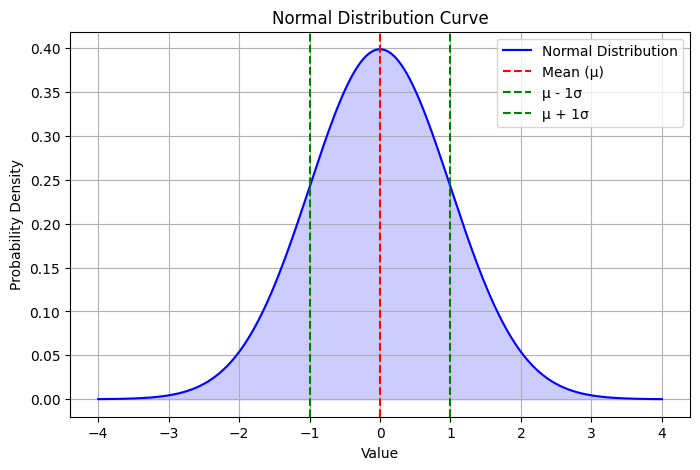

In [17]:
# normal distribution
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data for a normal distribution
mean = 0
std_dev = 1
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Normal Distribution", color='blue')
plt.fill_between(x, y, alpha=0.2, color='blue')  # Shaded area under the curve
plt.axvline(mean, color='red', linestyle='dashed', label="Mean (μ)")
plt.axvline(mean - std_dev, color='green', linestyle='dashed', label="μ - 1σ")
plt.axvline(mean + std_dev, color='green', linestyle='dashed', label="μ + 1σ")

# Labels and title
plt.title("Normal Distribution Curve")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()

# Show the plot
plt.show()


##### Remove Outliers

 1. Z-Score Method (Standard Deviation)
 When to use: When data is normally distributed.
 How it works. Compute mean(μ) and standard deviation (σ) of the dataset 
 Remove data points where (z)> threshold usually 3
 

In [21]:
import numpy as np
import pandas as pd

# Example dataset
data = pd.DataFrame({'values': [-100, 10, 12, 20, 14, 15, 30, 40, 31,  200, 16, 17, 19]})

# Compute Z-score
mean = np.mean(data['values'])
std_dev = np.std(data['values'])
data['Z-score'] = (data['values'] - mean) / std_dev

# Remove outliers (Z-score > 3 or < -3)
clean_data = data[np.abs(data['Z-score']) < 2]
clean_data = clean_data.drop(columns=['Z-score'])
print(clean_data)

    values
1       10
2       12
3       20
4       14
5       15
6       30
7       40
8       31
10      16
11      17
12      19


(array([1., 0., 0., 0., 0., 0., 0., 7., 3., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([-100.,  -85.,  -70.,  -55.,  -40.,  -25.,  -10.,    5.,   20.,
          35.,   50.,   65.,   80.,   95.,  110.,  125.,  140.,  155.,
         170.,  185.,  200.]),
 <BarContainer object of 20 artists>)

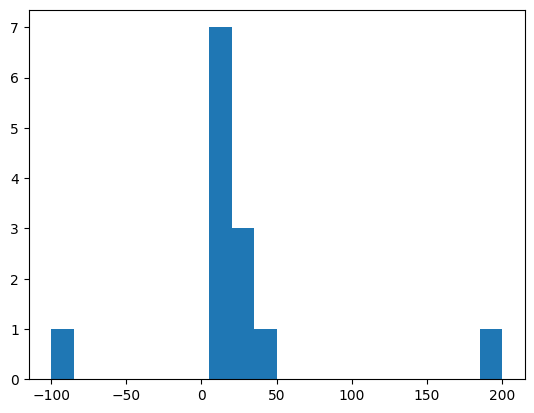

In [22]:
# draw histogram
import matplotlib.pyplot as plt

plt.hist(data['values'], bins=20)

(array([1., 1., 1., 1., 2., 0., 2., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1.]),
 array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. ,
        26.5, 28. , 29.5, 31. , 32.5, 34. , 35.5, 37. , 38.5, 40. ]),
 <BarContainer object of 20 artists>)

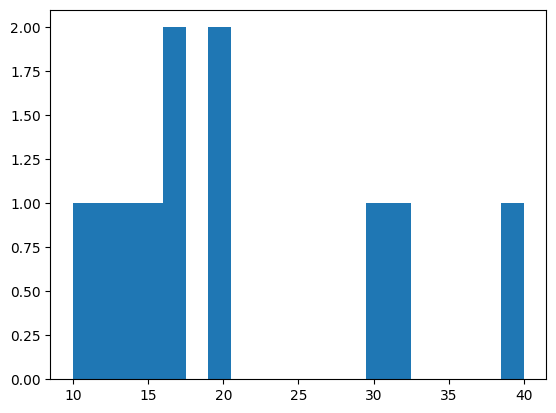

In [23]:
# Plotting the histogram of clean data 
plt.hist(clean_data['values'], bins=20)

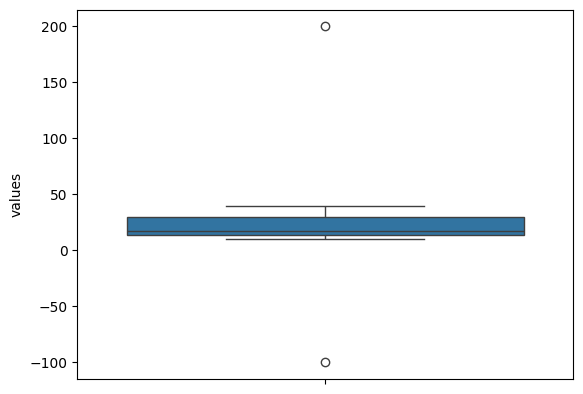

In [24]:
# draw boxplot
import seaborn as sns

sns.boxplot(data['values'])
plt.show()

2. IQR (Interquartile Range) Method
When to use: When data is skewed or non-normally distributed.

How it works:

Compute Q1 (25th percentile) and Q3 (75th percentile).
Calculate IQR = Q3 - Q1.
Define outlier thresholds:

Lower bound = Q1 - 1.5 × IQR
Upper bound = Q3 + 1.5 × IQR
Remove data points outside these bounds.

In [25]:
# Compute Q1, Q3, and IQR
Q1 = data['values'].quantile(0.25)
Q3 = data['values'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
clean_data = data[(data['values'] >= lower_bound) & (data['values'] <= upper_bound)]
print(clean_data)


    values   Z-score
1       10 -0.247251
2       12 -0.214114
3       20 -0.081567
4       14 -0.180978
5       15 -0.164409
6       30  0.084116
7       40  0.249800
8       31  0.100685
10      16 -0.147841
11      17 -0.131273
12      19 -0.098136


(array([1., 1., 1., 1., 2., 0., 2., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1.]),
 array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. ,
        26.5, 28. , 29.5, 31. , 32.5, 34. , 35.5, 37. , 38.5, 40. ]),
 <BarContainer object of 20 artists>)

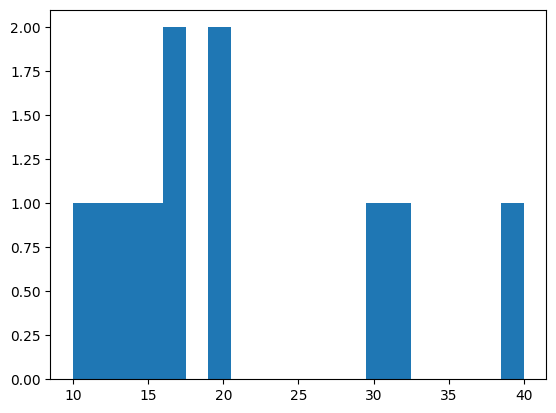

In [26]:
plt.hist(clean_data['values'], bins=20)

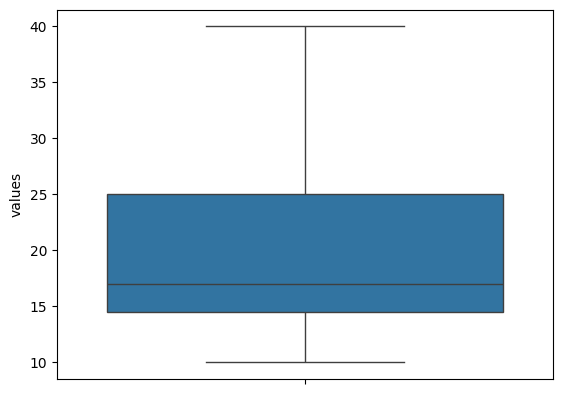

In [8]:
# Box plot of the clean data 
sns.boxplot(clean_data["values"])
plt.show()

3. Percentile-Based Capping (Winsorization)
When to use: When you want to limit extreme values instead of removing them.

How it works:

Set upper and lower percentiles (e.g., 1st and 99th percentiles).
Cap values beyond these percentiles.

In [30]:
lower_cap = data['values'].quantile(0.01)
upper_cap = data['values'].quantile(0.99)

data['values'] = np.clip(data['values'], lower_cap, upper_cap)
print(data)

      values   Z-score
0   -3.62944 -2.069772
1   10.00000 -0.247251
2   12.00000 -0.214114
3   20.00000 -0.081567
4   14.00000 -0.180978
5   15.00000 -0.164409
6   30.00000  0.084116
7   36.76000  0.249800
8   31.00000  0.100685
9   36.76000  2.900740
10  16.00000 -0.147841
11  17.00000 -0.131273
12  19.00000 -0.098136


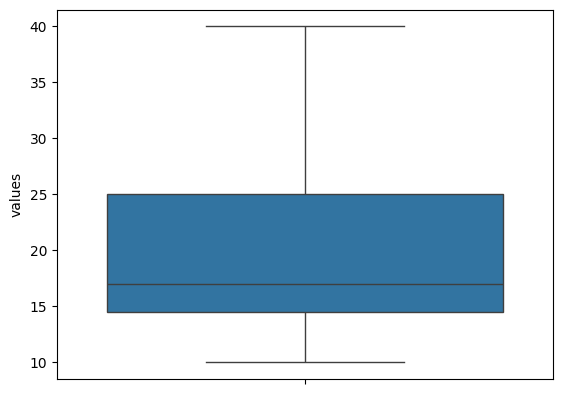

In [11]:
sns.boxplot(clean_data['values'])
plt.show()